# **Predicting Survival on the Titanic**

### **Importing Modules**

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **importing Csv FIle**

In [46]:
data = pd.read_csv("C:/Users/User/Downloads/Titanic-Dataset.csv")

### **Previewing data in Csv File**

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [49]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [50]:
data.shape

(891, 12)

In [51]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Replacing Null values in Column Age**

In [53]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [54]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Changing the Sex and Embarked column values to numerical values**

In [55]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


### **Plotting some graphs to show some Column relationships**

#### Clustered Bar chart

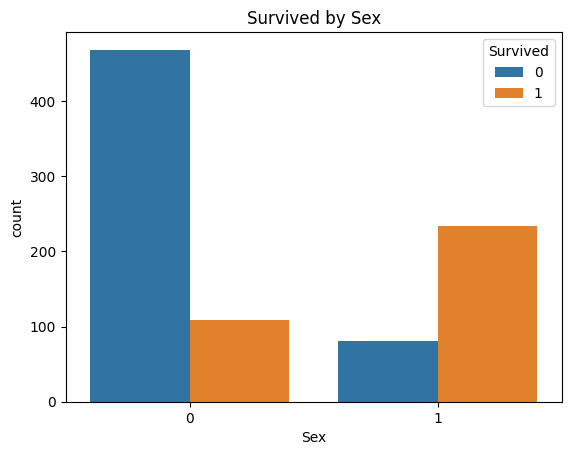

In [57]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survived by Sex')
plt.show()

#### Faceted Histogram

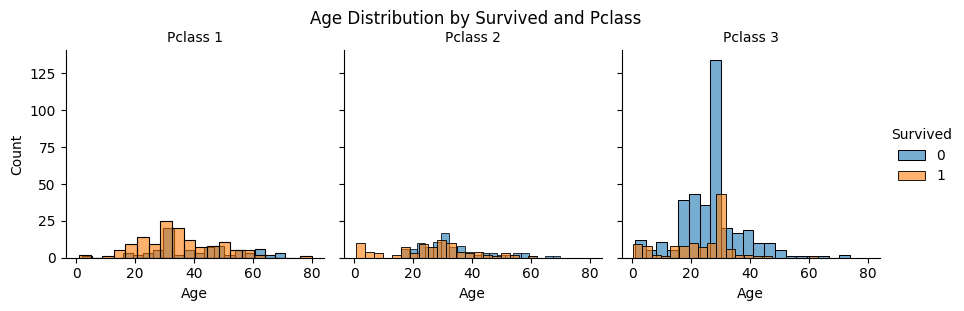

In [58]:
g = sns.FacetGrid(data, col='Pclass', hue='Survived')
g.map(sns.histplot, 'Age', bins=20, alpha=0.6)
g.add_legend()
g.set_titles(col_template='Pclass {col_name}')
plt.suptitle('Age Distribution by Survived and Pclass', y=1.02)
plt.show()

#### Pairwise Comparison plot

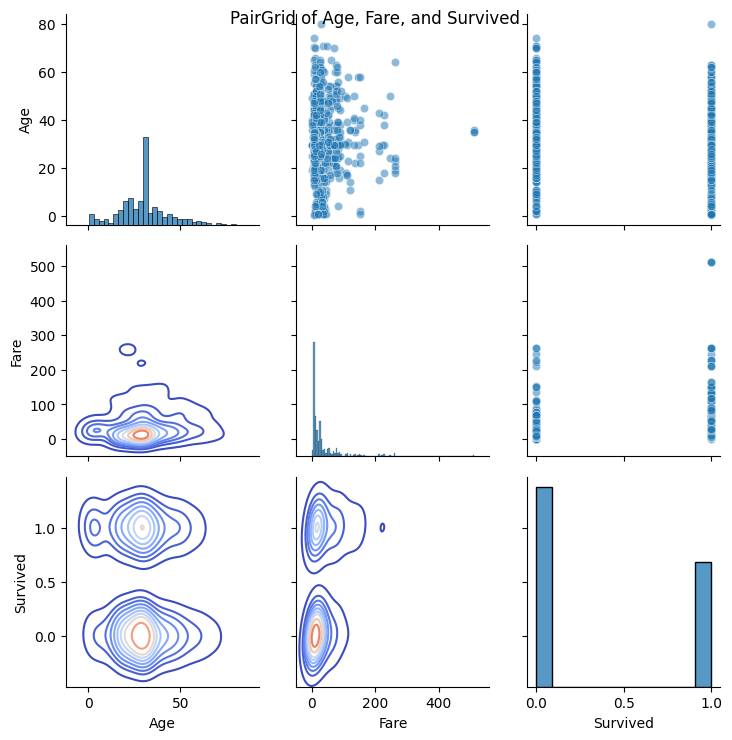

In [59]:
g = sns.PairGrid(data, vars=['Age', 'Fare', 'Survived'])
g.map_upper(sns.scatterplot, alpha=0.5)
g.map_diag(sns.histplot, kde_kws={'color': 'red'})
g.map_lower(sns.kdeplot, cmap='coolwarm')
plt.suptitle('PairGrid of Age, Fare, and Survived')
plt.show()

### **Removing Rows with missing Embarked values and assigning it to a new Variable** 

In [60]:
data_cleaned = data.dropna(subset=['Embarked'])

### **Model**

#### Importing modules

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Dropping Irrelevant Columns (Non Numeric Columns)

In [62]:
train = data_cleaned.drop(['Survived', 'PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

#### Extracting target variable

In [63]:
test = data_cleaned['Survived']

#### Splitting the data into training and testing set

In [64]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

#### Initializing the Logistic Regression model

In [65]:
log_reg = LogisticRegression()

#### Training the model

In [66]:
log_reg.fit(X_train, y_train)

LogisticRegression()

#### Predicting the test set

In [67]:
pred = log_reg.predict(X_test)

In [68]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

#### Showing the Accuracy of the Model

In [69]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.8426966292134831

#### In this analysis, we aimed to predict survival outcomes for passengers aboard the Titanic using a logistic regression model. The dataset contains various features such as Name, Sex 	Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked details. Our objective was to build a predictive model that accurately classifies passengers as survivors or non-survivors based on these attributes.

#### We first preprocessed the data by removing non-numeric columns and irrelevant features such as 'PassengerId', 'Name', 'Cabin' and 'Ticket'. We then split the dataset into training and testing sets using a 70-30 split. A logistic regression model was trained on the training data, and predictions were made on the test data.

#### The logistic regression model achieved an accuracy of 84% on the test set. This indicates that the model correctly predicted survival outcomes for 84% of the passengers in the test set. 

#### An accuracy of 84% suggests that the logistic regression model performs reasonably well in predicting survival outcomes on the Titanic dataset. However, it's essential to acknowledge the limitations of the analysis, such as potential biases in the data, simplifications made in feature selection, and assumptions of the logistic regression model.

#### In conclusion, our logistic regression model demonstrates promising performance in predicting survival outcomes on the Titanic dataset. Further analysis could explore alternative modeling techniques, refine feature engineering strategies, and address limitations to improve predictive accuracy. Nonetheless, the insights gained from this analysis contribute to our understanding of factors influencing survival rates on the Titanic.